# SDA - recitation 1

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
# %matplotlib widget
%matplotlib inline

import ipywidgets as widgets

%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

## Dirac's delta

$ \delta(x) = lim_{\sigma \to 0}\delta_\sigma(x) $

$ \delta_\sigma(x) = \frac{1}{\sigma \sqrt{\pi}}e^{-\frac{x^{2}}{\sigma^{2}}} $

In [10]:
def ddelta(r, sigma = 1):
    return np.exp(-r**2/sigma**2) / (sigma * np.sqrt(math.pi))

def interactive_plot_delta(sigma):
    r = np.arange(-2, 2, .01)
    fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
    ax.plot(r, ddelta(r, sigma),label=f'\u03C3={sigma}')
    ax.set_ylim(0,10)
    ax.grid()
    
    

_ = widgets.interact(interactive_plot_delta, sigma=(0.05,1,0.05))
    

interactive(children=(FloatSlider(value=0.5, description='sigma', max=1.0, min=0.05, step=0.05), Output()), _d…

### Other functions can also be used to represent Dirac's delta, such as a square function:

In [11]:
def square_dirac(r, eps=.1):
    func = np.zeros(len(r))
    func[r>-eps/2] = 1/eps
    func[r>eps/2] = 0
    return func
    
def interactive_plot_delta(eps):
    r = np.arange(-2, 2, .01)
    fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
    ax.plot(r, square_dirac(r, eps),label=f'\u03C3={eps}')
    ax.set_ylim(0,10)
    ax.grid()

_ = widgets.interact(interactive_plot_delta, eps=(0.05,1,0.05))

interactive(children=(FloatSlider(value=0.5, description='eps', max=1.0, min=0.05, step=0.05), Output()), _dom…

#### the durac delta function can be used to analytically represent the sampling of a signal

### Sampling a signal
Sampling a signal at different frequenies leads to a distortion of the original signal at low smapling frequencies (Nyquist)

In [12]:
def interactive_plot_sampling(samp):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 8*math.pi, .01)
    v = np.sin(r)
    ax.plot(r,v,linewidth=0.7)
    rsamp = np.arange(0, 8*math.pi, samp)
    vsamp = np.sin(rsamp)
    ax.plot(rsamp,vsamp,'*:')
    ax.set_title(f'Sample: {samp}')

_ = widgets.interact(interactive_plot_sampling, samp=(0.1,5,0.2))                 

interactive(children=(FloatSlider(value=2.5000000000000004, description='samp', max=5.0, min=0.1, step=0.2), O…

### what is a good sampling frequency? try and find a rule

### test your rule on the following function, explain the results

In [13]:
def interactive_plot_sampling(samp):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 30*math.pi, .01)
    v = np.sin(r) + np.cos(r/10)*2
    ax.plot(r,v,linewidth=0.7)
    rsamp = np.arange(0, 30*math.pi, samp)
    vsamp = np.sin(rsamp) + np.cos(rsamp/10)*2
    ax.plot(rsamp,vsamp,'*:')
    ax.set_title(f'Sample: {samp}')

_ = widgets.interact(interactive_plot_sampling, samp=(0.1,8,0.1))    

interactive(children=(FloatSlider(value=4.0, description='samp', max=8.0, min=0.1), Output()), _dom_classes=('…

consider what happens when the sampling frequecncy is low, what does it capture and what does it miss?

### Quantizing a signal

$ n_{bits} =log_2\frac{range}{resolution} $,       $  resolution = \frac{range}{2^{n_{bits}}}$

can you calculate the resolution for the following?

In [14]:
def interactive_plot_quantify(quant):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 8*math.pi, .01)
    v = (np.sin(r)+1)/2
    ax.plot(r,v,linewidth=0.7)
    vals = 2 ** quant
    q = np.floor(v * vals)/(vals-1)
    ax.plot(r,q)
    ax.set_title(f'Use {quant} bits')

_ = widgets.interact(interactive_plot_quantify, quant=([1,2,4,8,16]))

interactive(children=(Dropdown(description='quant', options=(1, 2, 4, 8, 16), value=1), Output()), _dom_classe…

In [15]:
### bad quantization, what happens when quantization is incorrect?

In [18]:
def quantify(func, vals):
    q = [vals[np.argmin(np.abs(i-vals))] for i in func]
    return q

def interactive_plot_quantify(quant, q_range, amp):
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    r = np.arange(0, 8*math.pi, .01)
    v = (np.sin(r)+1)/2 * amp
    ax.plot(r,v,linewidth=0.7)
    vals = np.linspace(0, q_range, quant**2)
    q = quantify(v, vals)
    ax.plot(r,q)
    ax.set_title(f'Use {quant} bits')

_ = widgets.interact(interactive_plot_quantify, quant=([1,2,4,8,16]), q_range = (1,10,1), amp=(1,11,1))

interactive(children=(Dropdown(description='quant', options=(1, 2, 4, 8, 16), value=1), IntSlider(value=5, des…

### how many bits would you need to optimally quanitize it?

## stochastic processes:

### for each of the following stochastic processes determine whether they are stationary and ergodic?

#### 1) Rolling standard dice
#### 2) Rolling biased dice
#### 3) Gaussian noise
#### 4) A process X(t) = Y cos(ωt + θ), where ω is a constant, Y and θ are independent RVs. θ is uniformly distributed in [0, 2π].


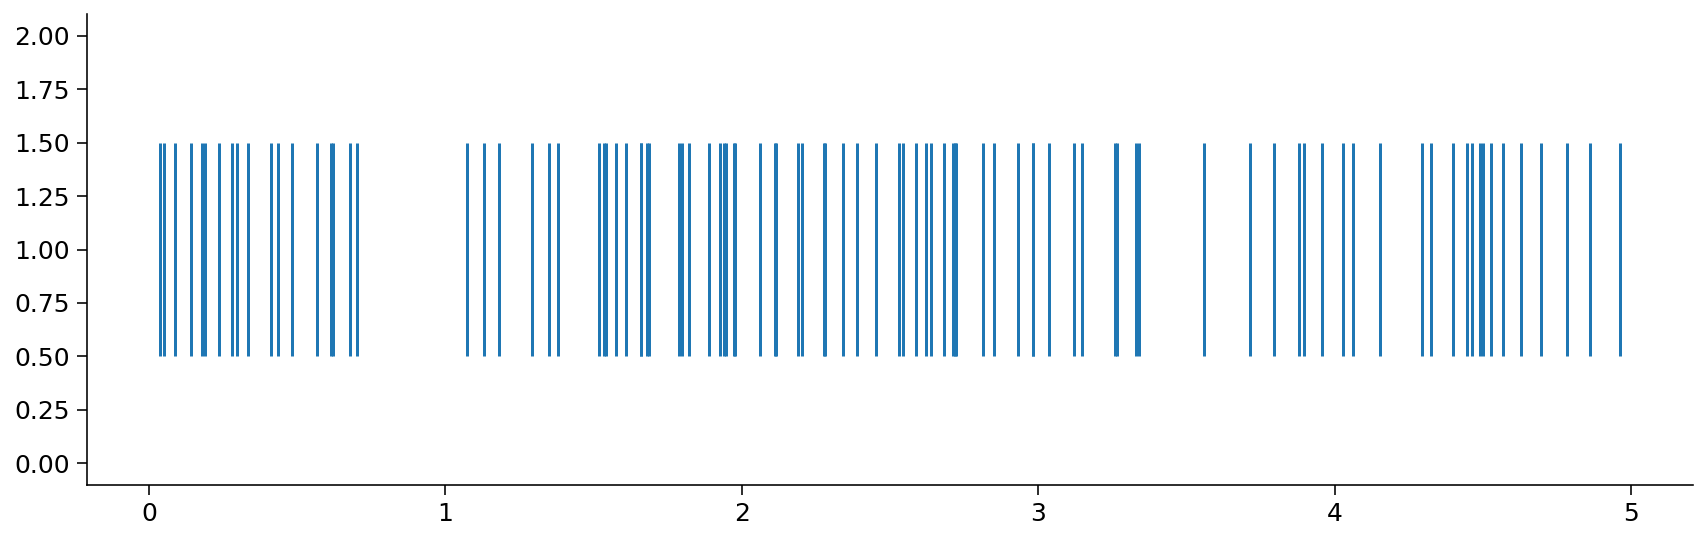

In [5]:
# Generate a "spike train" of a simulated Poisson neuron 

samp = 1000
rate = 20 / samp
duration = 5

spk_array = (np.random.uniform(size=samp*duration)<rate).astype(np.int32)
# spk_array.shape
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
ax.eventplot(np.nonzero(spk_array))
__ = ax.set_xticklabels(np.arange(-1,6))


## binning to calculate firing rate

In [31]:
def binned_rate(bin_size):
    binned = np.zeros(len(spk_array))
    for i in np.arange(0,len(spk_array),bin_size):
        binned[i:i+bin_size] = sum(spk_array[i:(i+bin_size)])
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(np.array(binned))
    __ = ax.set_xticklabels(np.arange(-1,6))
    
_ = widgets.interact(binned_rate, bin_size = (1,150,5))

interactive(children=(IntSlider(value=71, description='bin_size', max=150, min=1, step=5), Output()), _dom_cla…

### using convolution to calculate firing rate

In [58]:
def gaussian_rate(window_size, std):
    window = sig.gaussian(window_size, std)
    gauss = np.convolve(spk_array, window)
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(gauss)
    __ = ax.set_xticklabels(np.arange(-1,6))

_ = widgets.interact(gaussian_rate, window_size=(10,400,10), std=(10,70,5))


interactive(children=(IntSlider(value=200, description='window_size', max=400, min=10, step=10), IntSlider(val…

### using convolution to smooth

In [55]:
def convolution_smoothing(window_size, std):
    r = np.arange(0, 30*math.pi, .01)
    v = np.sin(r) + np.cos(r/10)*2
    noise = np.random.normal(loc=0, scale=0.3, size=len(r))
    signal = noise + v
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    ax.plot(signal)
    window = sig.gaussian(window_size, std)
    smooth = np.convolve(signal, window)
    ax.plot(smooth)

_ = widgets.interact(convolution_smoothing, window_size=(10,250,10), std=(0.5,5,0.5))

interactive(children=(IntSlider(value=130, description='window_size', max=250, min=10, step=10), FloatSlider(v…

### what are the problems you recognize with the smoothed signal?

### how can you correct these problems?